In [2]:
from sympy import *
init_printing(use_unicode=True)

In [3]:
def seq(t1=Symbol('t_1'),
           t2=Symbol('t_2'),
           l=Symbol('l'),
           q=Symbol('q'),
           m1=Symbol('m_1'),
           m2=Symbol('m_2'),
           b1=Symbol('b_1'),
           b2=Symbol('b_2')):
    #profits
    pi1 = .5*( (t2-t1)/3.0 +q)*(1+ (1/(3*q))*(t2-t1) )
    pi2 = .5*( (t1-t2)/3.0 +q)*(1+ (1/(3*q))*(t1-t2) )
    #use SPE/backward induction to solve game

    #nash bargaining objectives
    v2 = (pi2 - pi2.subs(t2,l) )**b2 * (m1*t1 +m2*t2)**(1-b2)

    #second mover
    v2_foc = diff(v2,t2)
    print v2_foc
    print '----'
    #solve for t1 as a function of t2
    h1 = solve(v2_foc,t2)
    h1 = h1[-1]
    print h1
    print '----'
    #susbitute h1 for t2, then substitute l into the second term for t1
    v1 = (pi1.subs(t2,h1) - pi2.subs({t1:l, t2:h1.subs(t1,l)}) )**b1 * (m1*t1 + m2*h1)**(1-b1)
    v1_foc = diff(v1,t1)
    
    print v1
    print '----'
    print v1_foc
    print '----'
    print solve(v1_foc,t1)
    print '----'
    t1_param = solve(v1_foc,t1)[-1]
    t2_param = h1.subs(t1,t1_param) 

    pi1_param = pi1.subs({t1:t1_param, t2:t2_param})
    pi2_param = pi2.subs({t1:t1_param, t2:t2_param})
    
    return (l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param)
    
seq(l = 1,q = 1, m1 = .5, m2 = .5, b1 = .5,b2 = .5)

0.25*(0.5*t_1 + 0.5*t_2)**(-0.5)*(-0.166666666666667*t_2 + 0.166666666666667)**0.5 - 0.0833333333333333*(0.5*t_1 + 0.5*t_2)**0.5*(-0.166666666666667*t_2 + 0.166666666666667)**(-0.5)
----
-0.5*t_1 + 0.5
----
(-0.25*t_1 - 0.0833333333333333)**0.5*(0.25*t_1 + 0.25)**0.5
----
-0.125*(-0.25*t_1 - 0.0833333333333333)**(-0.5)*(0.25*t_1 + 0.25)**0.5 + 0.125*(-0.25*t_1 - 0.0833333333333333)**0.5*(0.25*t_1 + 0.25)**(-0.5)
----
[-0.666666666666667]
----


-0.0833333333333333*(-0.166666666666667*t_2 + 0.166666666666667)**(-0.5)*(m_1*t_1 + 0.5*t_2)**0.5 + 0.25*(-0.166666666666667*t_2 + 0.166666666666667)**0.5*(m_1*t_1 + 0.5*t_2)**(-0.5)
----
-m_1*t_1 + 0.5
----
(0.5*m_1*t_1 + 0.25)**0.5*(-0.166666666666667*m_1*t_1 - 0.166666666666667*m_1 - 0.166666666666667*t_1 + 1.11022302462516e-16)**0.5
----
0.25*m_1*(0.5*m_1*t_1 + 0.25)**(-0.5)*(-0.166666666666667*m_1*t_1 - 0.166666666666667*m_1 - 0.166666666666667*t_1 + 1.11022302462516e-16)**0.5 + (-0.0833333333333333*m_1 - 0.0833333333333333)*(0.5*m_1*t_1 + 0.25)**0.5*(-0.166666666666667*m_1*t_1 - 0.166666666666667*m_1 - 0.166666666666667*t_1 + 1.11022302462516e-16)**(-0.5)
----
[-4.0e-30*(1.25e+29*m_1**2 + 6.24999999999999e+28*m_1 + 6.25e+28)/(m_1*(m_1 + 1.0))]
----


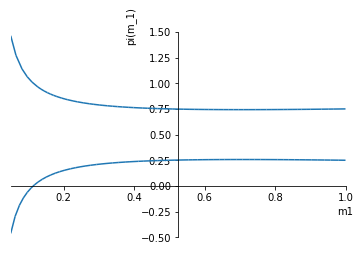

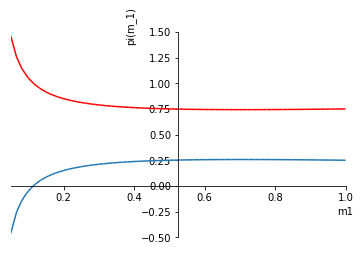

In [5]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(l = 1,q = 1, m2 = .5, b1 = .5,b2 = .5)
graph1= plot(pi1_param,pi2_param,(m1,.05,1.0),ylabel='pi(m_1)',xlabel='m1')
graph1[0].line_color = 'r'
graph1.save('plots/m1_const_seq.png')

0.5*m_2*(-0.166666666666667*t_2 + 0.166666666666667)**0.5*(m_2*t_2 + 0.3*t_1)**(-0.5) - 0.0833333333333333*(-0.166666666666667*t_2 + 0.166666666666667)**(-0.5)*(m_2*t_2 + 0.3*t_1)**0.5
----
0.05*(10.0*m_2 - 3.0*t_1)/m_2
----
(0.5*m_2 + 0.15*t_1)**0.5*(-0.166666666666667*t_1 - 0.166666666666667 + 0.00833333333333333*(10.0*m_2 - 3.0)/m_2 + 0.00833333333333333*(10.0*m_2 - 3.0*t_1)/m_2)**0.5
----
(-0.0833333333333333 - 0.0125/m_2)*(0.5*m_2 + 0.15*t_1)**0.5*(-0.166666666666667*t_1 - 0.166666666666667 + 0.00833333333333333*(10.0*m_2 - 3.0)/m_2 + 0.00833333333333333*(10.0*m_2 - 3.0*t_1)/m_2)**(-0.5) + 0.075*(0.5*m_2 + 0.15*t_1)**(-0.5)*(-0.166666666666667*t_1 - 0.166666666666667 + 0.00833333333333333*(10.0*m_2 - 3.0)/m_2 + 0.00833333333333333*(10.0*m_2 - 3.0*t_1)/m_2)**0.5
----
[-(200.0*m_2**2 + 30.0*m_2 + 9.0)/(120.0*m_2 + 18.0)]
----


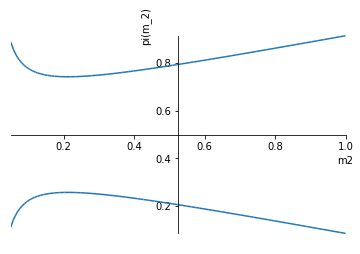

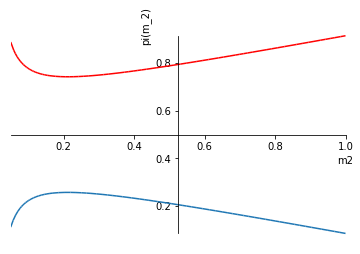

In [6]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(l = 1, q = 1, m1 = .3, b1 = .5,b2 = .5)
graph2= plot(pi1_param,pi2_param,(m2,.05,1.0),ylabel='pi(m_2)',xlabel='m2')
graph2[0].line_color = 'r'
graph2.save('plots/m2_const_seq.png')

In [62]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(l = 1, m1 = .5, m2=.5, b1 = .5,b2 = .5)
graph3= plot(pi1_param,pi2_param,(q,1,1.5),ylabel='pi(q)',xlabel='q')
graph3.save('plots/q_const_seq.png')

0.25*(0.5*t_1 + 0.5*t_2)**(-0.5)*(-(1 + (t_1 - 1)/(3*q))*(0.5*q + 0.166666666666667*t_1 - 0.166666666666667) + (1 + (t_1 - t_2)/(3*q))*(0.5*q + 0.166666666666667*t_1 - 0.166666666666667*t_2))**0.5 + (0.5*t_1 + 0.5*t_2)**0.5*(-(1 + (t_1 - 1)/(3*q))*(0.5*q + 0.166666666666667*t_1 - 0.166666666666667) + (1 + (t_1 - t_2)/(3*q))*(0.5*q + 0.166666666666667*t_1 - 0.166666666666667*t_2))**(-0.5)*(-0.0833333333333333 - 0.0277777777777778*(t_1 - t_2)/q - 0.166666666666667*(0.5*q + 0.166666666666667*t_1 - 0.166666666666667*t_2)/q)
----
2.0*q + 0.333333333333333*t_1 + 0.333333333333333*sqrt(36.0*q**2 + 30.0*q*t_1 - 18.0*q + 7.0*t_1**2 - 6.0*t_1 + 3.0)
----
(-(1 + (-2.0*q - 0.333333333333333*sqrt(36.0*q**2 + 12.0*q + 4.0) + 0.666666666666667)/(3*q))*(0.166666666666667*q - 0.0555555555555556*sqrt(36.0*q**2 + 12.0*q + 4.0) + 0.111111111111111) + (1 + (2.0*q - 0.666666666666667*t_1 + 0.333333333333333*sqrt(36.0*q**2 + 30.0*q*t_1 - 18.0*q + 7.0*t_1**2 - 6.0*t_1 + 3.0))/(3*q))*(0.833333333333333*q - 0.1

IndexError: list index out of range

In [38]:
#vary m1, write results to file
out = open("seq.csv","w+")
out.write('l,lambda,mu_1,mu_2,beta_1,beta_2,theta_1,theta_2,pi_1,pi_2\n')
for m in range(5,100,5):
    m = m/100.0
    out.write('%s,%s,%s,%s,%s,%s,%s,%s,%s,%s\n'%seq(l = 1,q = 1, m1 = m, m2 = .5, b1 = .5,b2 = .5))
out.close()

-0.0833333333333333*(0.166666666666667*l - 0.166666666666667*t_2)**(-0.5)*(0.5*t_1 + 0.5*t_2)**0.5 + 0.25*(0.166666666666667*l - 0.166666666666667*t_2)**0.5*(0.5*t_1 + 0.5*t_2)**(-0.5)
----
0.5*l - 0.5*t_1
----
(-0.0833333333333333*l - 0.25*t_1)**0.5*(0.25*l + 0.25*t_1)**0.5
----
-0.125*(-0.0833333333333333*l - 0.25*t_1)**(-0.5)*(0.25*l + 0.25*t_1)**0.5 + 0.125*(-0.0833333333333333*l - 0.25*t_1)**0.5*(0.25*l + 0.25*t_1)**(-0.5)
----
[-0.666666666666667*l]
----


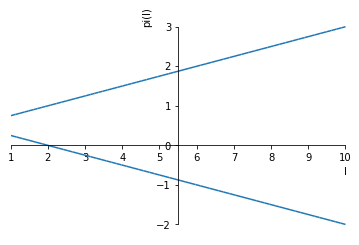

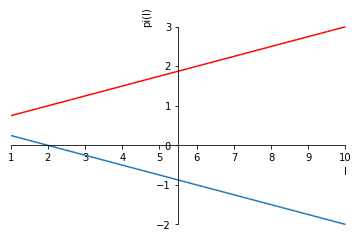

In [7]:
(l,q,m1,m2,b1,b2,t1_param,t2_param,pi1_param,pi2_param) = seq(q = 1, m1 = .5, m2=.5, b1 = .5,b2 = .5)
graph4= plot(pi1_param,pi2_param,(l,1,10),ylabel='pi(l)',xlabel='l')
graph4[0].line_color = 'r'
graph4.save('plots/l_const_seq.png')